In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import linear regression model
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [2]:
x= np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
y=1/(1+np.exp(-x))

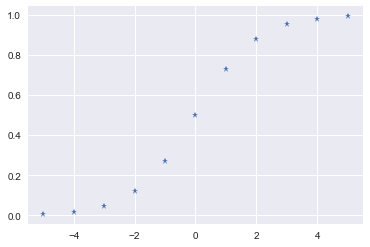

In [3]:
plt.plot(x,y, '*') #sigmodal function

In [4]:
y

array([0.00669285, 0.01798621, 0.04742587, 0.11920292, 0.26894142,
       0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715])

In [5]:
x= np.array([5.0,5.5,6.5,6.8,7.0,8.0,8.5,9.8,10.5])
y=np.array([0,0,0,0,0,1,1,1,1])

In [6]:
beta1=np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
beta1

0.24539877300613494

In [7]:
beta0= np.mean(y)-beta1*np.mean(x)
beta0

-1.3987730061349688

In [8]:
ypredict= 1/(1+np.exp(-beta0-beta1*x))

In [9]:
ypredict

array([0.45716051, 0.48773252, 0.54892273, 0.56707784, 0.57908501,
       0.63747397, 0.66532519, 0.73226308, 0.76457255])

In [10]:
np.mean(ypredict)

0.6044014881426881

In [11]:
ypredict_tru=[]
for val in ypredict:
    if val>np.mean(ypredict):
        ypredict_tru.append(1)
    else:
        ypredict_tru.append(0)
print(ypredict_tru)

    

[0, 0, 0, 0, 0, 1, 1, 1, 1]


In [12]:
pwd

'C:\\Users\\ASUS\\Desktop\\great learning\\week6'

In [76]:
A=pd.read_csv('prima-indians-diabetes.csv', header=None)

In [77]:
A.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
A.columns=['Preg', 'Glu', 'Bp', 'Sft', 'Ins','Bmi', 'Bpf', 'Age', 'Class']

In [79]:
A.head()

,Preg,Glu,Bp,Sft,Ins,Bmi,Bpf,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [80]:
A.corr()

,Preg,Glu,Bp,Sft,Ins,Bmi,Bpf,Age,Class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glu,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Sft,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Ins,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Bpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [81]:
x1=np.array(A['glu'])
y1=np.array(A['class'])
x2=np.array(A['bmi'])


KeyError: 'glu'

In [82]:
beta1=np.sum((x1-np.mean(x1))*(y1-np.mean(y1)))/np.sum((x1-np.mean(x1))**2)
beta1

0.006960225751927552

In [83]:
beta0= np.mean(y1)-beta1*np.mean(x1)
beta0

-0.49249489634012683

In [84]:
ypredict= 1/(1+np.exp(-beta0-beta1*x1))

In [85]:
ypredict

array([0.63125825, 0.5247608 , 0.68594437, 0.53169873, 0.61326467,
       0.57807872, 0.51259801, 0.57638018, 0.70654645, 0.59327803,
       0.56786114, 0.66302926, 0.61656094, 0.69487019, 0.65991211,
       0.550707  , 0.58147023, 0.56273004, 0.55586783, 0.57638018,
       0.59495643, 0.54898424, 0.70510125, 0.58316312, 0.6231212 ,
       0.59327803, 0.62963663, 0.54553523, 0.62638465, 0.57977541,
       0.56615233, 0.64730656, 0.52996529, 0.53689429, 0.58822989,
       0.55586783, 0.61491412, 0.55414884, 0.5334314 , 0.56956833,
       0.68142879, 0.60664115, 0.56101663, 0.66767846, 0.64889395,
       0.68142879, 0.62801209, 0.50042028, 0.55586783, 0.55930177,
       0.55586783, 0.55242855, 0.52996529, 0.6753547 , 0.63449257,
       0.50390032, 0.69191072, 0.550707  , 0.62801209, 0.55930177,
       0.52302472, 0.60664115, 0.45357288, 0.61984654, 0.57467983,
       0.54898424, 0.56615233, 0.56615233, 0.54208185, 0.62801209,
       0.550707  , 0.61656094, 0.59495643, 0.59997819, 0.51433

In [86]:
ypredict_tru=[]
for val in ypredict:
    if val>np.mean(ypredict):
        ypredict_tru.append(1)
    else:
        ypredict_tru.append(0)
print(ypredict_tru)


[1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 

In [87]:
count=0
for i in np.arange(len(y1)):
    if ypredict_tru[i]==y1[i]:
        count+=1
        
print(count)


541


In [88]:
acc=(count/len(y1))*100
print(acc)

70.44270833333334


In [89]:
#for bmi
b1=np.sum((x1-np.mean(x1))*(y1-np.mean(y1)))/np.sum((x1-np.mean(x1))**2)
b2=np.sum((x2-np.mean(x2))*(y1-np.mean(y1)))/np.sum((x2-np.mean(x2))**2)
b0= np.mean(y1)-b2*np.mean(x2)
b0, b1, b2


(-0.21751921597439955, 0.006960225751927552, 0.017706530155038355)

In [90]:
ypredict2= 1/(1+np.exp(-b0-b1*x1-b2*x2))

In [91]:
ypredict2_tru=[]
for val in ypredict2:
    if val>np.mean(ypredict2):
        ypredict2_tru.append(1)
    else:
        ypredict2_tru.append(0)
print(ypredict2_tru)


[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 

In [92]:
count=0
for i in np.arange(len(y1)):
    if ypredict2_tru[i]==y1[i]:
        count+=1
        
print(count)

535


In [93]:
acc=(count/len(y1))*100
print(acc)

69.66145833333334


In [94]:
np.mean(ypredict2)

0.7629640885769776

In [95]:
x3=np.array(A['age'])

KeyError: 'age'

In [96]:
b3=np.sum((x3-np.mean(x3))*(y1-np.mean(y1)))/np.sum((x3-np.mean(x3))**2)

b0, b1, b2,b3

(-0.21751921597439955,
 0.006960225751927552,
 0.017706530155038355,
 0.009666834703521702)

In [97]:
ypredict3= 1/(1+np.exp(-b0-b1*x1-b2*x2-b3*x3))

In [98]:
ypredict3_tru=[]
for val in ypredict3:
    if val>np.mean(ypredict3):
        ypredict3_tru.append(1)
    else:
        ypredict3_tru.append(0)
print(ypredict2_tru)


[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 

In [99]:
count=0
for i in np.arange(len(y1)):
    if ypredict3_tru[i]==y1[i]:
        count+=1
        
print(count)

549


In [100]:
acc=(count/len(y1))*100
print(acc)

71.484375


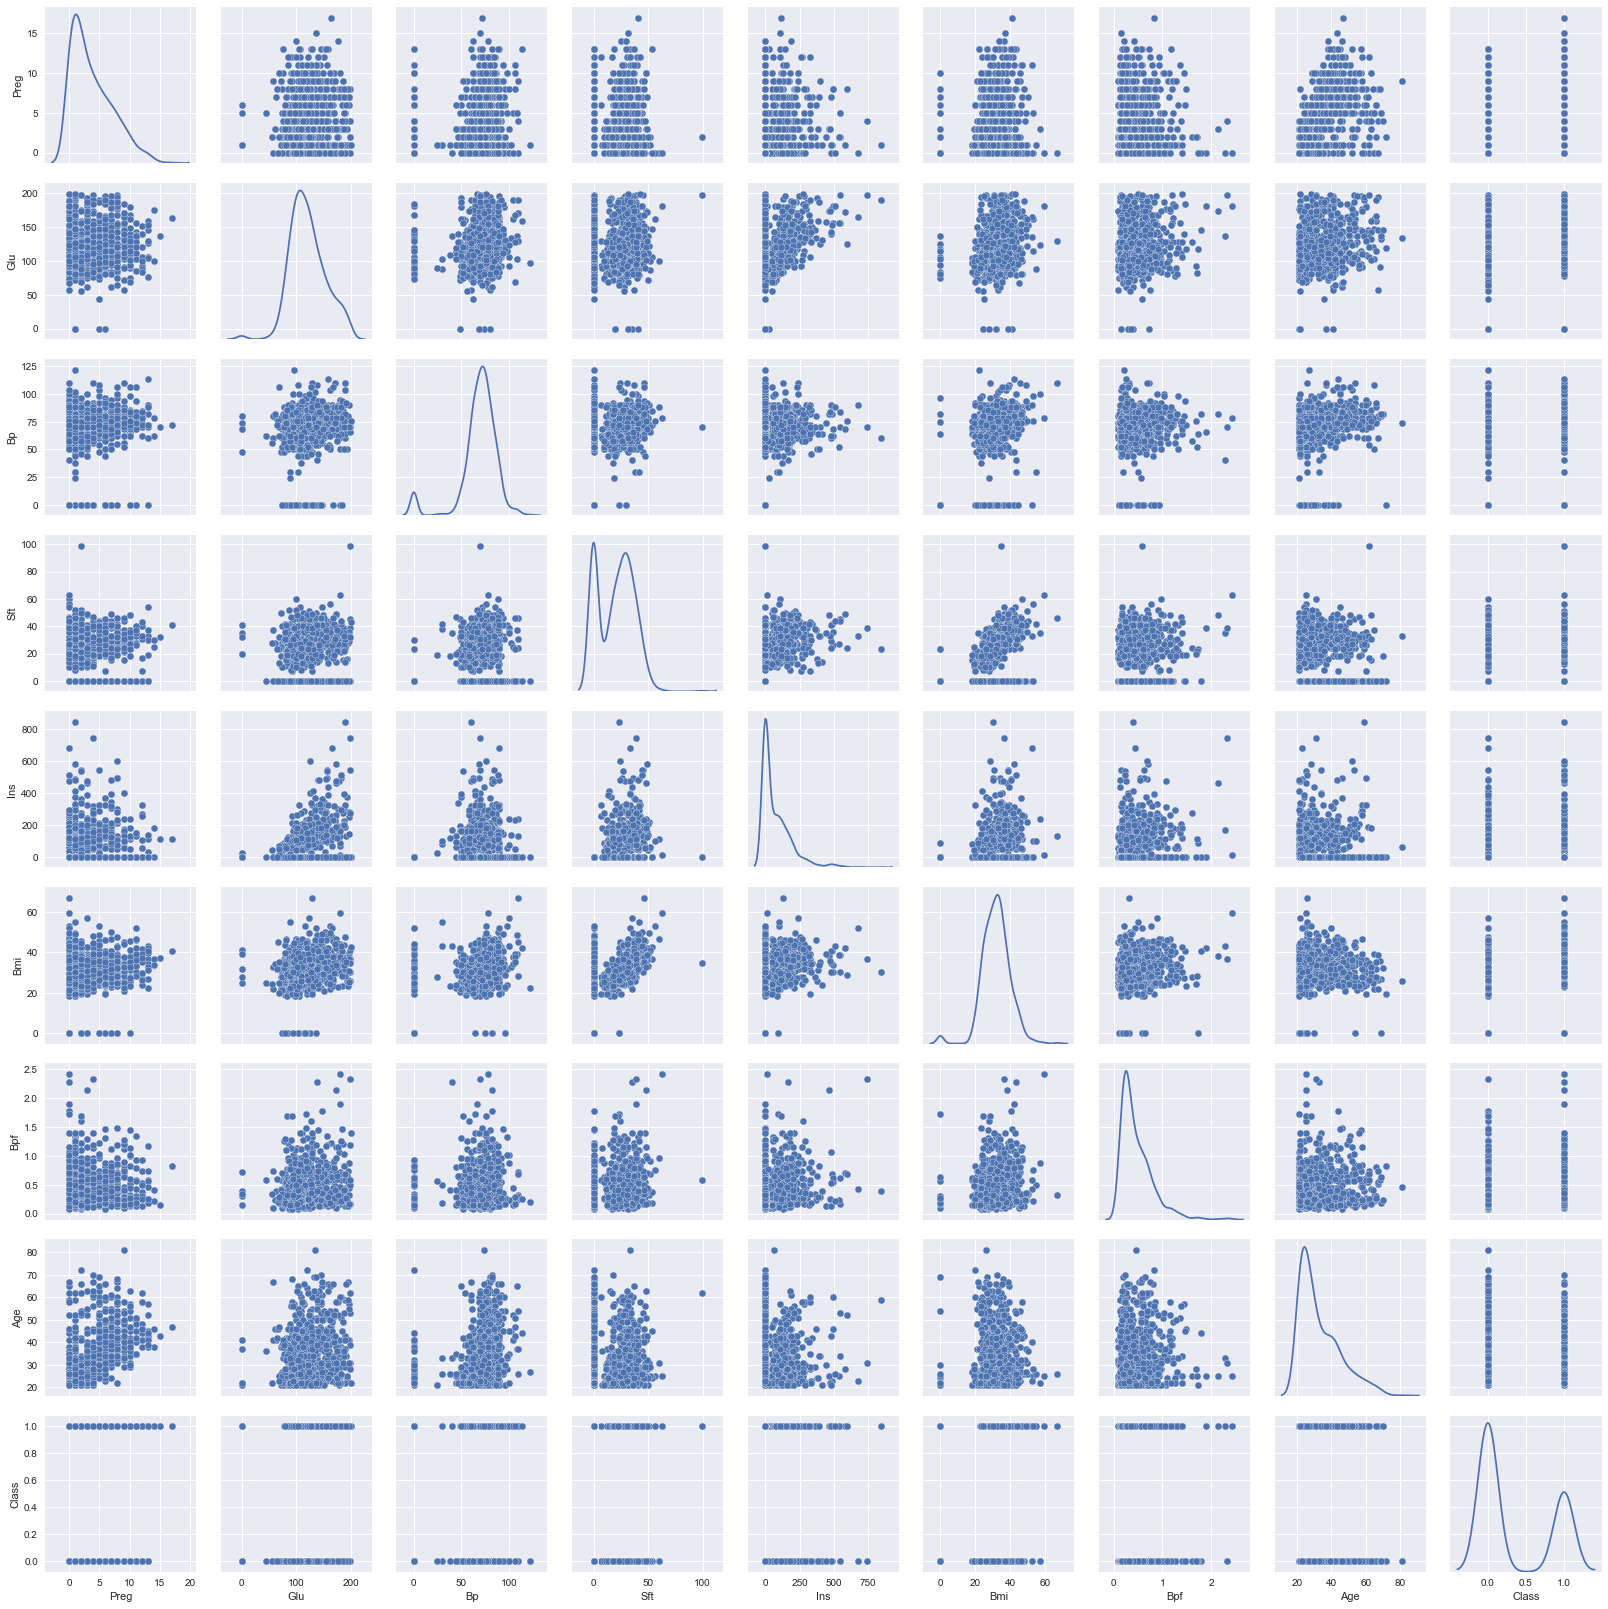

In [101]:
sns.pairplot(A, diag_kind='kde')

In [102]:
A.head()

,Preg,Glu,Bp,Sft,Ins,Bmi,Bpf,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [103]:
A[~A.applymap(np.isreal).all(1)] # to check if there is any unwanted or missing value in data
# shouldnt be used with categorical column with string type. you have convert them into numeric one

,Preg,Glu,Bp,Sft,Ins,Bmi,Bpf,Age,Class


In [104]:
A= A.fillna(A.median())
#A['ins']=np.log(1+A['ins']) # ins column was skewed, so to correct it we performed log transform
#A['dpf']=np.log(1+A['dpf'])
#A['age']=np.log(1+A['age'])
#A['glu']=np.log(1+A['glu'])
#A['bp']=np.log(1+A['bp'])
#A['sft']=np.log(1+A['sft'])

In [106]:
A=A.drop(['Sft'], axis=1)
A=A.drop(['Age'], axis=1)
A=A.drop(['Ins'], axis=1)

In [107]:
x=A.drop(['Class'], axis=1)
y=A[['Class']]

In [108]:
model=LogisticRegression()

In [109]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.3, random_state=1)

In [111]:
model.fit(xtrain,ytrain)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
ypredict=model.predict(xtest)
ypredict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [113]:
acc=metrics.accuracy_score(ytest,ypredict)

In [114]:
acc*100

77.92207792207793

In [115]:
A.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glu,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Bpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [116]:
model.intercept_

array([-4.94700044])

In [117]:
ytest['Class'].value_counts()

0    146
1     85
Name: Class, dtype: int64

In [118]:
#train test split internally performs chi square test to maintain the proportion of train and test values.

In [119]:
#cofusion matrix

cm= metrics.confusion_matrix(ytest,ypredict)

In [120]:
cm

array([[134,  12],
       [ 39,  46]], dtype=int64)

In [123]:

A.describe()

,Preg,Glu,Bp,Bmi,Bpf,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,31.992578,0.471876,0.348958
std,3.369578,31.972618,19.355807,7.884160,0.331329,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,62.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,32.000000,0.372500,0.000000
75%,6.000000,140.250000,80.000000,36.600000,0.626250,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,1.000000


In [124]:
m1= smf.ols('Class~Preg+Glu+Bp+Bmi+Bpf',A).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     64.92
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           1.76e-56
Time:                        14:21:47   Log-Likelihood:                -384.39
No. Observations:                 768   AIC:                             780.8
Df Residuals:                     762   BIC:                             808.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7966      0.082     -9.765      0.000      -0.957      -0.636
Preg           0.0258      0.004      5.898      0.000       0.017       0.034
Glu            0.0059      0.000     12.482      0.000       0.005       0.007
Bp            -0.0021      0.001     -2.648      0.008      -0.004      -0.001
Bmi            0.0128      0.002      6.539      0.000       0.009       0.017
Bpf            0.1430      0.044      3.218      0.001       0.056       0.230
==============================================================================
Omnibus:                       39.537   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.027
Skew:                           0.416   Prob(JB):                     1.11e-07
Kurtosis:                       2.445   Cond. No.                         827.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
#True negative Rate
tnr= cm[0,0]/(cm[0,0]+cm[0,1])
tnr

0.9178082191780822

In [130]:
#True positive Rate
tpr=cm[1,1]/(cm[1,1]+cm[1,0])
tpr

0.5411764705882353

there is multi colinearity problem, which can  be solved by pca technique

0.7294923448831587


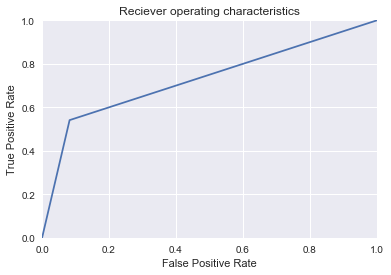

In [135]:
fpr,tpr,_=roc_curve(ytest,ypredict)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])

plt.ylim([0.0,1.0])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Reciever operating characteristics')

plt.show()